# 계층적 군집분석

K-means와 동일한 자료를 가지고 계층적 군집분석을 해 봅니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

## 나무그림(Dendrogram)그려서 군집 수 확인하기

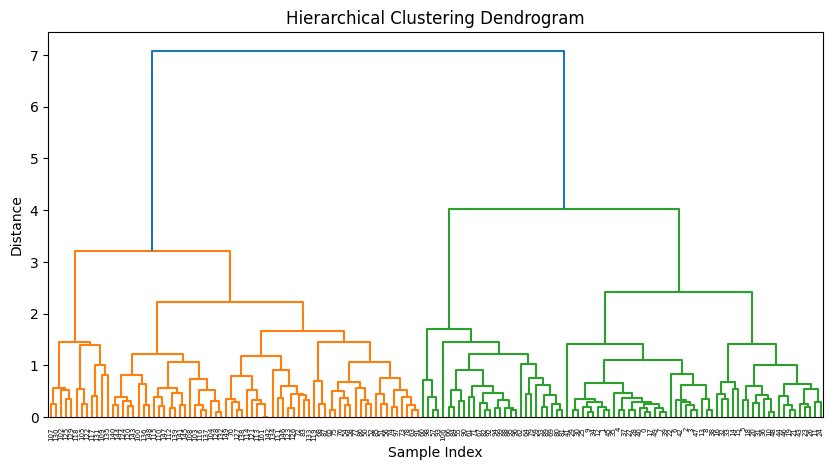

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Perform hierarchical clustering
linkage_matrix = linkage(X, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

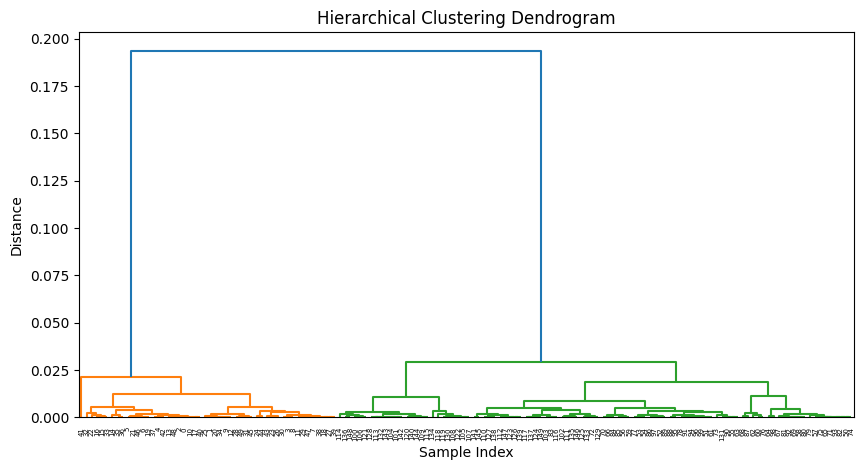

In [4]:
# Perform hierarchical clustering using cosine distance
linkage_matrix = linkage(X, method='complete', metric='cosine')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## 그림을 바탕으로 클러스터 개수 지정하여 클러스터링 실시


In [5]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [6]:
# HC을 위한 함수인 AgglomerativeClustering함수를 불러옵니다.
from sklearn.cluster import AgglomerativeClustering

# agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
# affinity는 거리를 재는 도구를 의미하며 'euclidean'등으로 변경 가능
# linkage는 거리를 연결하는 옵션
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# agg = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
# affinity는 거리를 재는 도구를 의미하며 'cosine'등으로 변경 가능
# linkage는 거리를 연결하는 옵션
agg.fit(X)

AgglomerativeClustering(n_clusters=3)

In [7]:
# Get the cluster labels
labels = agg.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 분류가 잘 되었는지 테스트를 해 봅니다.

In [8]:
y_test = iris.target
y_pred = agg.labels_

print("y_test is:", y_test)
print("y_pred is:", y_pred)

y_test is: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred is: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 거리를 기준점으로(Treshold) 지정하여 HC해 봅니다.

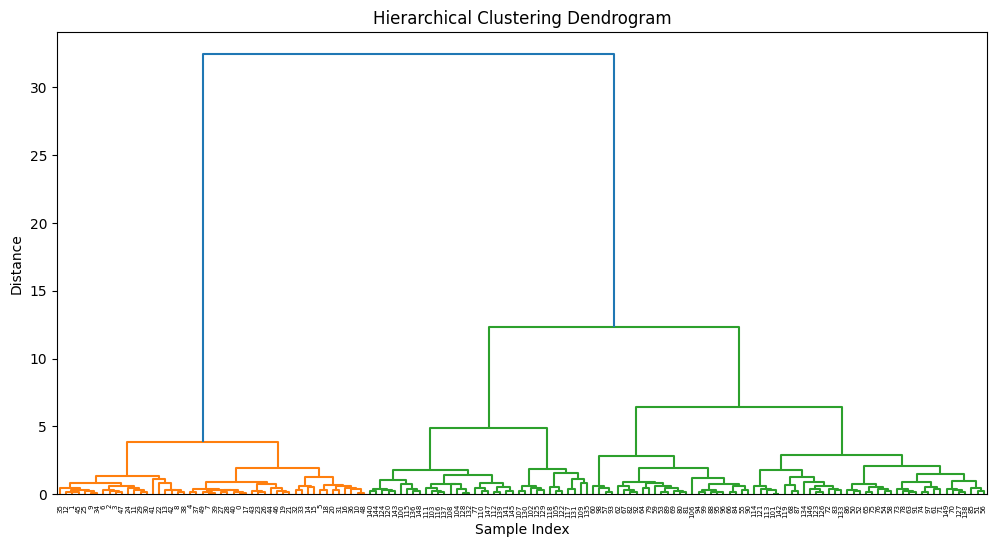

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = iris.data

# Perform hierarchical clustering
Z = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [10]:
# Cut the dendrogram at a distance threshold
# fcluster함수를 사용합니다.
threshold = 7
labels = fcluster(Z, t=threshold, criterion='distance')
print(labels)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 참고자료1
DBSCAN

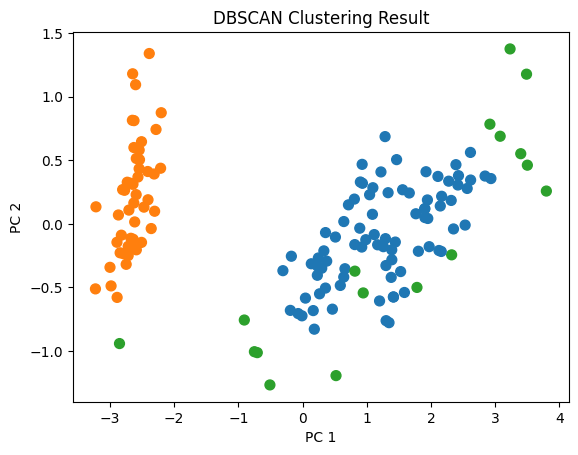

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Visualize the clustering result
colors = np.array(['#ff7f0e', '#1f77b4', '#2ca02c'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, color=colors[y_pred])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('DBSCAN Clustering Result')
plt.show()

## 참고자료2
Gaussian Mixture Model

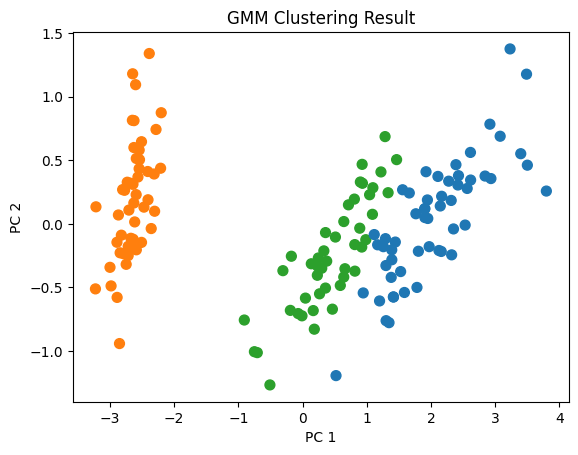

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_pred = gmm.predict(X)

# Visualize the clustering result
colors = np.array(['#ff7f0e', '#1f77b4', '#2ca02c'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, color=colors[y_pred])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('GMM Clustering Result')
plt.show()